# [캐글 영화추천 시스템](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system)   

> 추가 데이터 [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)


추천 시스템은 **정보 필터링** 시스템의 한 유형으로, 사용자의 검색 기록을 통해 검색 결과 및 품질을 개선하고 더 관련있는 항목을 제공하는 것을 목적으로 하며 사용자가 항목에 평가할 등급이다 선호도를 예측하는데 사용된다.

해당 커널에서는 TMDB 5000 영화 데이터셋을 사용해 기본적인 영화 추천 시스템을 구축할 것이다. 

사용할 추천 시스템은 아래와 같다.

* 인구통계학적 필터링(Demographic Filtering)
 ```
 인구통계학적 필터링은 비슷한 인구통계적 특징을 가진 사용자에게 일반화된 항목(영화)를 제공한다. 이 시스템은 대중적이고 비평가들의 호평을 받은 영화는 대게 대중들이 좋아할 것이라는 점을 바탕으로 하지만 사용자들은 제각기 다른 특징을 가지고있기 때문에 이 방식은 사용자들을 지나치게 일반화한다는 평가를 받는다.
 ```
 ---
* 콘텐츠 기반 필터링(Content Based Filtering)
```
콘텐츠 기반 필터링은 영화의 장르, 감독, 설명 등과 같은 메타 데이터를 기반으로 비슷한 항목(영화)을 제안한다. 
해당 시스템은 사용자 A가 특정 항목을 좋아하면 이와 유사한 항목도 좋아할 것이라는 점을 바탕으로 한다.
```
---
* 협업 기반 필터링(Collaborative Filtering)
```
협업 기반 필터링은 비슷한 관심사를 가진 사람들을 매칭하고 이를 기반으로 항목을 제공한다.
해당 시스템은 위에 기술한 콘텐츠 기반 필터링처럼 메타 데이터를 필요로 하지 않는다.
```

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
print(df1.shape)
df1.head()

(4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
print(df2.shape)
df2.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


 * 첫 번째 자료(dataset)는 다음과 같은 변수가 포함되어 있다.
  - movie_id : 영화 고유 식별자
  - cast : 주연 및 조연 배우 이름
  - crew : 감독, 편집자, 작곡가, 작가 등의 이름
 
 * 두 번째 자료는 다음과 같은 변수가 포함되어 있다.
  - budget : 영화 제작 예산
  - genre : 영화 장르 (액션, 코메디, 스릴러 등)
  - homepage : 영화 홈페이지 링크
  - id : 이는 첫 번째 자료와 같이 movie_id이다.
  - keywords : 영화와 관련된 태그 또는 키워드
  - original_language : 영화가 만들어진 언어
  - original_title : 번역 및 각색 전 원제목
  - overview : 영화에 대한 간략한 설명
  - popularity : 영화 인기 수치
  - production_companies : 영화 제작사
  - production_countries : 영화 제작된 나라
  - release_date : 영화 상영일
  - revenue : 전세계 영화 수익
  - runningtime : 영화 상영 시간
  - status : "Released" or "Rumored"
  - tagline : 포스터 문구
  - title : 영화 타이틀
  - vote_average : 영화가 받은 평균 평점
  - vote_count : 받은 투표 수

In [4]:
df1.columns = ['id','title','cast','crew']
df2 = df2.merge(df1)
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 인구통계학적 필터링(Demographic Filtering)
필터링을 시작하기 앞서
1. 영화 점수 및 비율을 위한 평가 지표 필요
2. 모든 영화 점수 계산
3. 점수를 정렬하고 사용자에게 최적의 영화 추천

높은 점수를 얻었지만 표를 많이 받지 못한 영화가 그와 반대인 영화 대비 추천도가 낮다고 간주되기 때문에 영화 평점은 가중 IMDB의 가중 평균(wr)을 사용한다.

$$Weighted \, Rating(WR) = (\frac{v}{v+m}.R) + (\frac{m}{v+m}.C)$$

 * v, 영화 득표 수
 * m, 차트 등재에 필요한 최소 득표 수
 * R, 영화 평균 평점
 * C, 전체 보고서 평균 득표 점
 
 우리는 이미 **v(vote_count)**와 **R(vote_average)**를 가지고 있으며 C는 아래와 같이 계산한다.

In [5]:
C = df2['vote_average'].mean()
C

6.092171559442011

전체 영화의 평균 점수는 10점 기준 6점이다.  
다음은 차트 등재에 필요한 최소 투표값인 m을 구할 것이다. 이 과정에서 90번째 백분위수를 컷오로 사용할 것이다.  
즉, 영화가 차트에 등재되기 위해서는 최소 90%보다 많은 표를 얻어야 한다. 

In [6]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

다음 과정은 차트에서 적합한 영화를 걸러낼 것이다.

In [7]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 22)

위 과정을 통해 조건에 맞는 영화는 481편의 영화가 있음을 알 수 있다.  

다음은 자격을 갖춘 영화에 대한 지표를 계산할 것이다.   
이를 위해 **weight_rating()**(가중평균) 정의 및 DataFrame에 적용해 계산하고 새로운 특징을 정의할 것이다. 

## 평가 함수

In [8]:
def weight_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    #IMDB 공식을 바탕으로한 계산
    return (v/(v+m)*R) + (m/(m+v)*C)

In [9]:
# 새로운 변수인 '점수'를 정의하고 weight_rating을 사용해 값을 계산한다. 
q_movies['score'] = q_movies.apply(weight_rating, axis=1)

'score' 변수 상위 15개 자료의 영화 제목, 투표 수, 투표 평균과 가중 평점을 출력한다. 

In [10]:
# 'score' 점수 내림차순으로 정력
q_movies = q_movies.sort_values('score', ascending=False)

# 상위 15개 영화 출력
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


위 과정을 통해 기본적인 추천 시스템을 만들었다.  

다음 과정으로는 인기 있는 영화를 도표로 정렬할 것이다. 

In [11]:
pop = df2.sort_values('popularity', ascending = False)

Text(0.5, 1.0, 'Popular Movies')

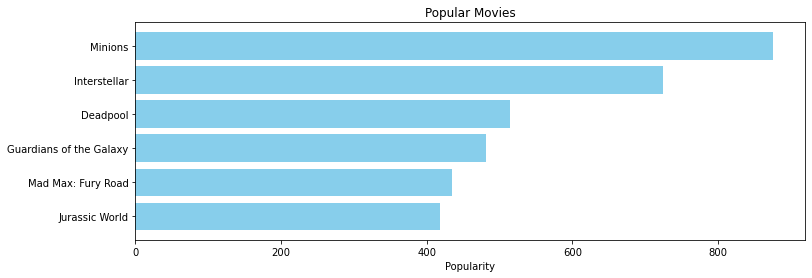

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6), pop['popularity'].head(6), align = 'center', color='skyblue')
plt.gca().invert_yaxis() # gca()는 현재 Axes() 객체를 반환한다. // .invert_yaxis() y축을 뒤집는다. 
plt.xlabel('Popularity') 
plt.title('Popular Movies')

> [df.gca().invert_yaxis() 참고](https://m.blog.naver.com/h920203/221684982345)

위 인구통계학 기반 추천 모델에서 주의해야 할 것은 모든 사용자에게 일반적인 차트를 제공한다는 것이다.
이는 특정 사용자의 관심과 취향에 관계없이 대중적인 정보만을 추천하게 되므로 더 발전된 추천 시스템 방식이 필요하다.

이제 좀 더 진보한 방식인 **Content Based Filtering**에 대해 알아보자.

# 콘텐츠 기반 필터링(Content Based Filtering)
영화 콘텐츠(배우, 제작진, 키워드 등)를 기반으로 하는 해당 추천 시스템은 다른 영화와의 유사성을 찾고 이를 통해 비슷한 콘텐츠를 기반으로 한 추천을 제공한다. 

![nn](https://image.ibb.co/f6mDXU/conten.png!%5Bimage.png%5D(attachment:image.png))

## 플롯 설명 기반 추천자(Plot Description Based Recommender)
영화의 플롯(패턴)을 기반으로 모든 영화마다 짝을 이뤄 유사성 점수를 계산하고 그 유사성 점수를 기반으로 한 영화 추천시스템을 만들어 보자.  
플롯 설명은 데이터 세트의 'overview'에 나와 있으므로 이를 확인해보자.

In [13]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

위 플롯을 처리하기 위해 단어들을 벡터화 하고 이를 통해 TF(Term Frequency-Inverse Document Frequency) 벡터를 계산할 것이다.  

**단어 빈도란**(TF, Term Frequency)란 특정 단어가 문서 내에서 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각될 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우 이것은 그 단어가 흔하게 등장하는 것을 의미하며 이를 문서 빈도(DF, Document Frequency)라 하며, 이 값의 역수를 역문서 빈도(IDF, Inverse Document Frequency)라 한다. 
이를 통해 나타나는 문서에 대한 단어의 중요성은 **TF*IDF**로 나타낼 수 있다.

위 과정을 토해 각 열이 플롯의 단어들을 나타내고 각 행이 이전과 같이 영화를 나타내는 행렬을 제공한다.  
이는 플롯에서 자주 발생하는 단어를 줄이고 최종 유사성 점수를 계산하는데 있어 중요성을 감소시키기 위해 수행한다. 

다음은 scikit-learn의 TfidfVectorizer 클래스를 통해 TF-IDF 행렬을 생성해본다.

In [14]:
# sklearn에서 TfidfVecotrizer import
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer 객체를 정의하고 'the', 'a'와 같은 단어 제거
tfidf = TfidfVectorizer(stop_words='english')

# NaN값은 공백 문자로 치환
df2['overview'] = df2['overview'].fillna('')

# 데이터 피팅 및 변환을 통해 필요한 TF-IDF 행렬을 구성
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# tfidf_matrix 결과물
tfidf_matrix.shape

(4803, 20978)

위 결과물을 통해 데이터셋에서 4800편의 영화를 묘사하기 위해 20,000개 이상의 다른 단어가 사용되었음을 알 수 있다.

행렬을 통해 유사성 점수를 계산할 수 있으며 유클리드, 피어슨, 코사인 유사서의 방법을 사용할 수 있다.  
어떤 점수가 최고인지에 대한 답은 없으나 시나리오에 따라 점수가 다르게 나올 수 있으므로 다른 지표 역시 사용해 실험해 보는 것이 좋다.
 
**코사인 유사성 점수**는 크기와 무관하고 상대적으로 계산이 쉽고 빠르기에 이 과정에서는 두 영화 사이의 유사성을 나타내는 정도를 계산하기 위해 코사인 유사성을 사용할 것이며 수식은 아래와 같다. 
$$similarity = cos(Ø) = \frac{A・B}{||A||||B||} = \frac{\sum_{i=1}^{n}A_iB_i}{\sqrt {\sum_{i=1}^{n}A_i^2} \sqrt{\sum_{i=1}^{n}B_i^2}}$$

우리는 TF-IDF벡터화를 사용했기 때문에 cosine_similarities()대신 sklearn의 linear_kernel()을 사용할 것이다.

In [15]:
from sklearn.metrics.pairwise import linear_kernel

# 코사인 유사도 평가
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

영화 제목을 입력으로 받고 가장 유사한 10편의 영화 목록을 출력하는 함수를 정의할 것이다.   
이를 위해서는 영화 제목과 DataFrame 지수의 역매핑이 필요하다. 즉, 제목이 주어진 메타데이터에서 영화를 식별하는 메커니즘이 필요하다. 

In [16]:
# 인덱스와 영화 제목 역구성
indices = pd.Series(df2.index, index = df2['title']).drop_duplicates()

아래는 추천 함수(get_recommendations)를 정의한 것으로 수행 과정은 다음과 같다.
1. 제목이 주어진 영화의 색인 가져오기
2. 모든 영화와 영화별 코사인 유사도 점수 목록을 가져온다. 
 - (요소 위치, 유사성 점수)형태의 튜플 목록으로 변환
3. 유사성 점수를 기반으로 튜플 목록 정렬
 - 요소 위치 기반으로 정렬
4. 이 목록의 상위 10개 요소 출력
 - 첫 번째 요소는 자신이므로 이는 생략한다.
5. 상단 요소의 인덱스는 해당하는 제목을 반환한다. 

In [44]:
def get_recommendations(title, cosine_sim = cosine_sim):
    # 제목과 일치하는 영화 색인
    idx = indices[title]
    
    # 영화별 짝을 이룬 영화의 유사성 점수 출력
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 유사성 점수를 기반으로한 영화 정렬
    sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse = True)
    
    # 유사도 점수 높은 상위 10개 영화 출력
    sim_scores = sim_scores[1:11]
    
    # 영화 인덱스
    movie_indices = [i[0] for i in sim_scores]
    
    # 유사도 상위 10개 영화 출력
    return df2[['title','director']].iloc[movie_indices]

In [45]:
get_recommendations('The Dark Knight Rises')

,title,director
65,The Dark Knight,christophernolan
299,Batman Forever,joelschumacher
428,Batman Returns,timburton
1359,Batman,timburton
3854,"Batman: The Dark Knight Returns, Part 2",jayoliva
119,Batman Begins,christophernolan
2507,Slow Burn,waynebeach
9,Batman v Superman: Dawn of Justice,zacksnyder
1181,JFK,oliverstone
210,Batman & Robin,joelschumacher


In [19]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

In [20]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

get_recommendations()는 비슷한 줄거리를 찾는 데는 준수하지만 추천의 품질은 썩 좋지 못한 것을 알 수 있다.  
예시로 'The Dark Knight Rises'를 검색한 경우 모든 베트맨 영화를 추천하지만 해당 영화 감독의 영화는 추천하지 못하므로 다소 아쉬운 추천을 제공한다.

## 크레딧, 장르 및 키워드 기반 추천
---
이번에는 배우, 감독, 장르 등의 메타 데이터를 활용한 추천 시스템을 구축할 것이다.   
현재 가지고 있는 '문자화된' 데이터 형태를 출연진, 제작진 및 키워드 변수에서 배우 세 명과 감독 및 영화와 관련된 키워드를 추출해 사용 가능한 구조로 변환한다. 

In [21]:
# 문자화된 변수를 파이썬 객체로 구문 분석한다.
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

다음으로 각 변수에서 필요한 정보를 추출하는데 도움이 될 함수를 작성한다.

In [22]:
# 제작자 변수에서 감독의 이름을 추출하고 없다면 NaN을 반환한다. 
def get_director(X):
    for i in X:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [23]:
# 상위 3개 요소와 전체 목록 중 더 많은 것을 반환한다. 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # 세 개 이상의 요소가 있는지 확인한다. 만약 3개 이상이면 첫 세 개만 반환하고, 그렇지 않으면 전체 목록을 반환한다. 
        if len(names) > 3:
            names = names[:3]
        return names

    # 유실된 데이터의 경우 빈 목록을 반환한다. 
    return []

In [24]:
# director, crew, genres, keywords 변수를 새롭게 정의
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [25]:
# 새로운 생성한 변수 확인
df2[['title','cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


이름과 키워드 인스턴스를 소문자로 변환하고 공백 제거  
(이는 벡터화가 'Johnny Depp'과 'Johnny Galecki'를 동일하게 계산하지 않게하기 위함이다.)

In [26]:
# 모든 문자열의 대소문자와 변환 및 공백 제거를 반환하는 함수
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        # 감독 존재 여부 확인하고 없을 경우 공백 문자 출력
        if isinstance(x, str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

In [27]:
features = ['cast', 'keywords','director','genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [28]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton


In [29]:
# 메타 데이터 백터화를 위한 "create_soup" 함수 생성
def create_soup(x):
    return ' '.join(x['keywords'])+' '+' '.join(x['cast'])+' '+x['director']+' '+' '.join(x['genres'])
    return ' '.join(x['keywords'])+' '+' '.join(x['cast'])+' '+x['director']+' '+' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)

In [30]:
df2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

다음은 더 많은 작품에 참여한 사람들의 가중치를 낮추지 않기 위해 **CountVectorizer()**를 사용해 텍스트 마이닝을 진행한다. 

In [31]:
# CountVectorizer를 import 하고 count matrix 생성
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df2['soup'])

In [32]:
# count_matrix에 기반한 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [33]:
# 기존 DataFrame의 인덱스 재설정 및 역매핑 구성
df2 = df2.reset_index()
indices = pd.Series(df2.index, index = df2['title'])

In [34]:
# Cosine_sim2를 사용해 영화 추천
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [46]:
get_recommendations('Avatar', cosine_sim2)

,title,director
206,Clash of the Titans,louisleterrier
71,The Mummy: Tomb of the Dragon Emperor,robcohen
786,The Monkey King 2,soicheang
103,The Sorcerer's Apprentice,jonturteltaub
131,G-Force,hoytyeatman
215,Fantastic 4: Rise of the Silver Surfer,timstory
466,The Time Machine,simonwells
715,The Scorpion King,chuckrussell
1,Pirates of the Caribbean: At World's End,goreverbinski
5,Spider-Man 3,samraimi


메타 데이터(영화 감독, 제작사, 키워드 등) 추가로 인해 더 나은 추천을 제공했다.  
마블이나 DC팬들은 해당 제작사 영화를 더 좋아할 수 있으므로 production_company 변수를 추가할 수 있고,  
soup 함수를 여러 번 추가해 감독에 가중치를 줄 수 있다.

# 협업 필터링(Collaborative Filtering)
> [협업 필터링 블로그 참조](https://hmkim312.github.io/posts/서프라이즈(Surprise)를_사용한_추천시스템(Recommendations)/)

콘텐츠 기반 필터링은 일부 유사한 영화 추천에만 적용 가능하다는 문제가 있다. 콘텐츠 기반 필터링은 유사한 영화 간 추천만 가능하며 개인적인 취향을 반영할 수 없으므로 개인의 특성에 맞춘 영화 추천은 못한다는 것을 알 수 있다. 

이번 섹션은 협업 필터링이라는 기술을 사용해 영화를 추천할 것이며 협업 필터링의 두가지 필터링에 대해 소개한다. 

* 유저 기반 필터링(User Based Filtering)
```
이 시스템은 사용자와 비슷한 사용자들이 좋아한 항목들을 추천하며, 두 사용자 간의 유사성을 측정하기 위해 피어슨 상관관계 또는 코사인 유사도를 사용할 수 있다. 
 - 아래 도표에서 행은 사용자를 나타내고 열은 해당 사용자와 대상 사용자 자가 평가한 영화를 기록한다. 
 - 각 셀은 사용자가 영화에 주는 점수를 표시하며 사용자 E와 유사도 측정을 목표로 가정한다.
 ```
![nn](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

```
사용자 A,F는 사용자 E와 다른 취향을 가지고 있기 때문에 B,C,D만 고려해 피어슨 상관관계를 통해 다음과 같은 유사성을 계산할 수 있다. 
```
![nn](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

```
위 표에서 피어슨 상관관계가 음수이므로 사용자D와 E는 다른 취향임을 알 수 있다. 
사용자 D의 경우 'Me Before You'를 평균보다 높게 평가했으나, E는 그 반대임을 알 수 있다. 
따라서 우리는 다른 사용자들을 통해 사용자 E가 평가하지 않은 영화의 빈칸을 채울 수 있다.
```
>사용자 기반 CF(협업 필터링)은 사용자의 선호도가 시간에 따라 변경될 수 있다는 점의 문제가 있다.  
이는 사용자 기반 매트릭스를 미리 계산할 경우 성능이 저하될 수 있음을 나타내며, 이를 해결하기 위해서는 아이템 기반 CF를 사용할 수 있다. 

* 아이템 기반 협업 필터링(Item Based Collaborative Filtering)
```
사용자간 유사성을 측정하는 대신, 사용자가 평가한 항목의 유사성을 기반으로 추천하는 필터링이다. 
위와 마찬가지로 코사인 유사도 및 피어슨 상관관계로 계산할 수 있다.
유저 기반 필터링과의 차이점은 항목 별로 수직으로 유사도를 평가한다는 것이다. 
```
다음 표는 영화 "Me Before you"를 통해 빈 칸을 수직으로 채우는 방법을 나타낸다.
![nn](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

아이템 기반 협업 필터링은 유저 기반 필터링에 비해 정적이므로 사용자 선호도에 의해 제기되는 문제를 방지할 수 있다.
그러나, 이 방법은 몇 가지 문제가 있으며 대표적으로 확장성과 희소성이 있으며 각각 문제는 다음과 같다.

* 확장성
 - 사용자 수 m, 항목 n
```
고객과 제품이 늘어날 수록 계산도 늘어나며 최악긔 경우 복잡도는 O(mn)이 된다.
```
     
* 희소성
```
위 표에서 매트릭스와 타이타닉의 등급을 평가한 사용자는 한 명이지만 둘 사이의 유사성은 1이다. 
극단적인 경우, 수백만 명의 사용자가 있고 상당히 다른 영화 A, B를 평가한 사용자가 유일하다면 유일한 사용자 값에 기반해 영화를 추천함으로 순위가 높아질 경우가 있다.
```

## 단일 값 분해(Single Value Decomposition)
---

협업 필터링에 의해 생성된 확장성 및 희소성을 처리하는 한 가지 방법은 **잠재 요인 모델**을 활용해 사용자와 항목 간 유사성을 포착하는 것이다.  
잠재적 요인이란 사용자나 아이템이 가진 속성이나 개념을 설명하는 광의적 아이디어로 예를 들어 음악의 경우 잠재적 요소는 음악의 장르가 될 수 있다.  

이번 과정은 SVD(단일 값 분해)를 통해 잠재적 요인을 찾아본다.
이는 각 사용자와 항목을 r차원 잠재 공간에 매핑하고 이를 통해 사용자와 항목이 직접 비교될 때 사용자 간의 관계를 더 잘 이해할 수 있게 된다.
> 이번 연습에서 사용할 평가 방법은 RMSE(Root Mean Square Error)로 해당 값이 낮을 수록 유리하다.  


![nn](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

SVD를 구현하기 위해 서프라이즈 라이브러를 사용할 것이며, 이전 데이터에서는 userid가 없었기 때문에 다른 데이터 셋을 불러온다.

In [48]:
from surprise import Reader, Dataset, SVD#, evaluate -> 2020년 1월 부로 변경됨.
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


해당 데이터는 이전 영화 데이터와 달리 5점 척도로 평가된다는 것을 유의하자.

In [50]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

svd = SVD()
cross_validate(svd, data, measures = ['RMSE','MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9013  0.8994  0.9007  0.8869  0.8957  0.8968  0.0053  
MAE (testset)     0.6930  0.6934  0.6920  0.6813  0.6898  0.6899  0.0045  
Fit time          6.00    6.09    6.25    6.05    6.05    6.09    0.09    
Test time         0.14    0.13    0.27    0.13    0.13    0.16    0.06    


{'test_rmse': array([0.90134412, 0.89938844, 0.9007196 , 0.88693351, 0.8956835 ]),
 'test_mae': array([0.69296468, 0.69339486, 0.69196541, 0.68128676, 0.68982387]),
 'fit_time': (5.999000787734985,
  6.089372158050537,
  6.254739284515381,
  6.046482086181641,
  6.047945261001587),
 'test_time': (0.14085912704467773,
  0.13495922088623047,
  0.273500919342041,
  0.13258004188537598,
  0.13396906852722168)}

교차 검증을 통해 0.89의 RMSE 값을 얻었으니 이제 데이터를 훈련하고 예측하도록 한다. 

In [51]:
trainset = data.build_full_trainset()
svd.fit(trainset)

userId 1을 확인해 그/그녀가 준 등급을 확인해본다. 

In [53]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [54]:
svd.predict(1, 302, 3) # predict(유저아이디, 아이템(영화) 아이디, 실제 평점, ets = 예측 평점)₩

Prediction(uid=1, iid=302, r_ui=3, est=2.763130449165904, details={'was_impossible': False})

영화 아이디가 302인 경우, 예측 평점은 2.7078이 된다. 이 추천 시스템의 한 가지 놀라운 특징은 영화가 무엇인지(또는 영화 내용이 무엇인지) 신경쓰지 않는다는 것이다.  
SVD는 할당된 영화 ID를 기반으로 작동하며 다른 사용자가 영화를 예측한 방식을 기반으로 예측한다.

# 결론
---
위 과정을 통해 인구통계학, 콘텐츠 기반, 협업 필터링을 사용해 추천 시스템을 만들었다. 
인구통계 필터링은 매우 기초적으로 실질적으로 사용될 수 없지만, **하이브리드 시스템**은 두 가지 접근 방식이 거의 보완적인 것으로 증명되었으므로 콘텐츠 기반 및 협업 필터링에 활용할 수 있다.   
지금까지 기초적인 프레임워크로 작성한 추천시스템을 마치도록 한다.